##  Stochastic RNA velocity analysis of Forebrain Glut using scRNAvelo

We use a stochastic version of the model for transcriptional dynamics used in velocyto (developed by the Linnarsson lab and Kharchenko Lab).

RNA velocity reference https://www.nature.com/articles/s41586-018-0414-6 <br>

Files needed: hgForebrainGlut.loom (will be downloaded automatically)

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as pl

import scvelo as scv
import scanpy.api as sc
sc.settings.verbosity=3 # i.e. show errors(0), warnings(1), infos(2) and hints(3)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

results_file = './write/ForebrainGlut.h5ad' 
scv.__version__
scv.logging.print_version_and_date()

Running scvelo 0.1.5 on 2018-09-05 13:51.


## Load and cleanup the data

In [2]:
adata = sc.read('data/ForebrainGlut/hgForebrainGlut.loom', cleanup=True, sparse=True, cache=True, 
                backup_url='http://pklab.med.harvard.edu/velocyto/hgForebrainGlut/hgForebrainGlut.loom')
adata.var_names_make_unique()

... reading from cache file ./cache/data-ForebrainGlut-hgForebrainGlut.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
sc.logging.print_memory_usage()

scv.pp.show_proportions(adata)
scv.pp.cleanup(adata, clean='all')

adata

Memory usage: current 0.36 GB, difference +0.36 GB
abundance of ['spliced', 'unspliced', 'ambiguous']: [0.66 0.27 0.07]


AnnData object with n_obs × n_vars = 1720 × 32738 
    layers: 'spliced', 'unspliced'

## Preprocess the data

In [4]:
scv.pp.recipe_velocity(adata, min_counts=3, n_pcs=50, n_top_genes=5000, n_neighbors=30, log=True)

filtered out 18034 genes that are detected in less than 3 counts
If you pass `n_top_genes`, all cutoffs are ignored.
computing neighbors


/Users/volker.bergen/anaconda3/envs/testenv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


    finished (0:00:03.35) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments
    finished (0:00:02.02) --> added to `.layers`
    'Ms', moments of spliced abundances
    'Mu', moments of unspliced abundances


## Compute velocity and velocity graph

In [5]:
scv.tl.velocity(adata, mode='stochastic', filter_genes=True)

computing velocities
    finished (0:00:03.14) --> added to `.layers`
    'velocity', velocity vectors for each individual cell


In [6]:
scv.tl.velocity_graph(adata, n_recurse_neighbors=3)

computing velocity graph
    finished (0:00:04.54) --> added to `.uns`
    'velocity_graph', sparse matrix with cosine correlations


## Project the velocity graph onto an embedding

In [7]:
sc.tl.louvain(adata, resolution=.7, random_state=4)
scv.tl.velocity_embedding(adata, basis='pca')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.30) --> found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
computing velocity embedding
    finished (0:00:00.27) --> added to `.obsm`
    'velocity_pca', embedded velocity vectors


## Cluster and annotate the data

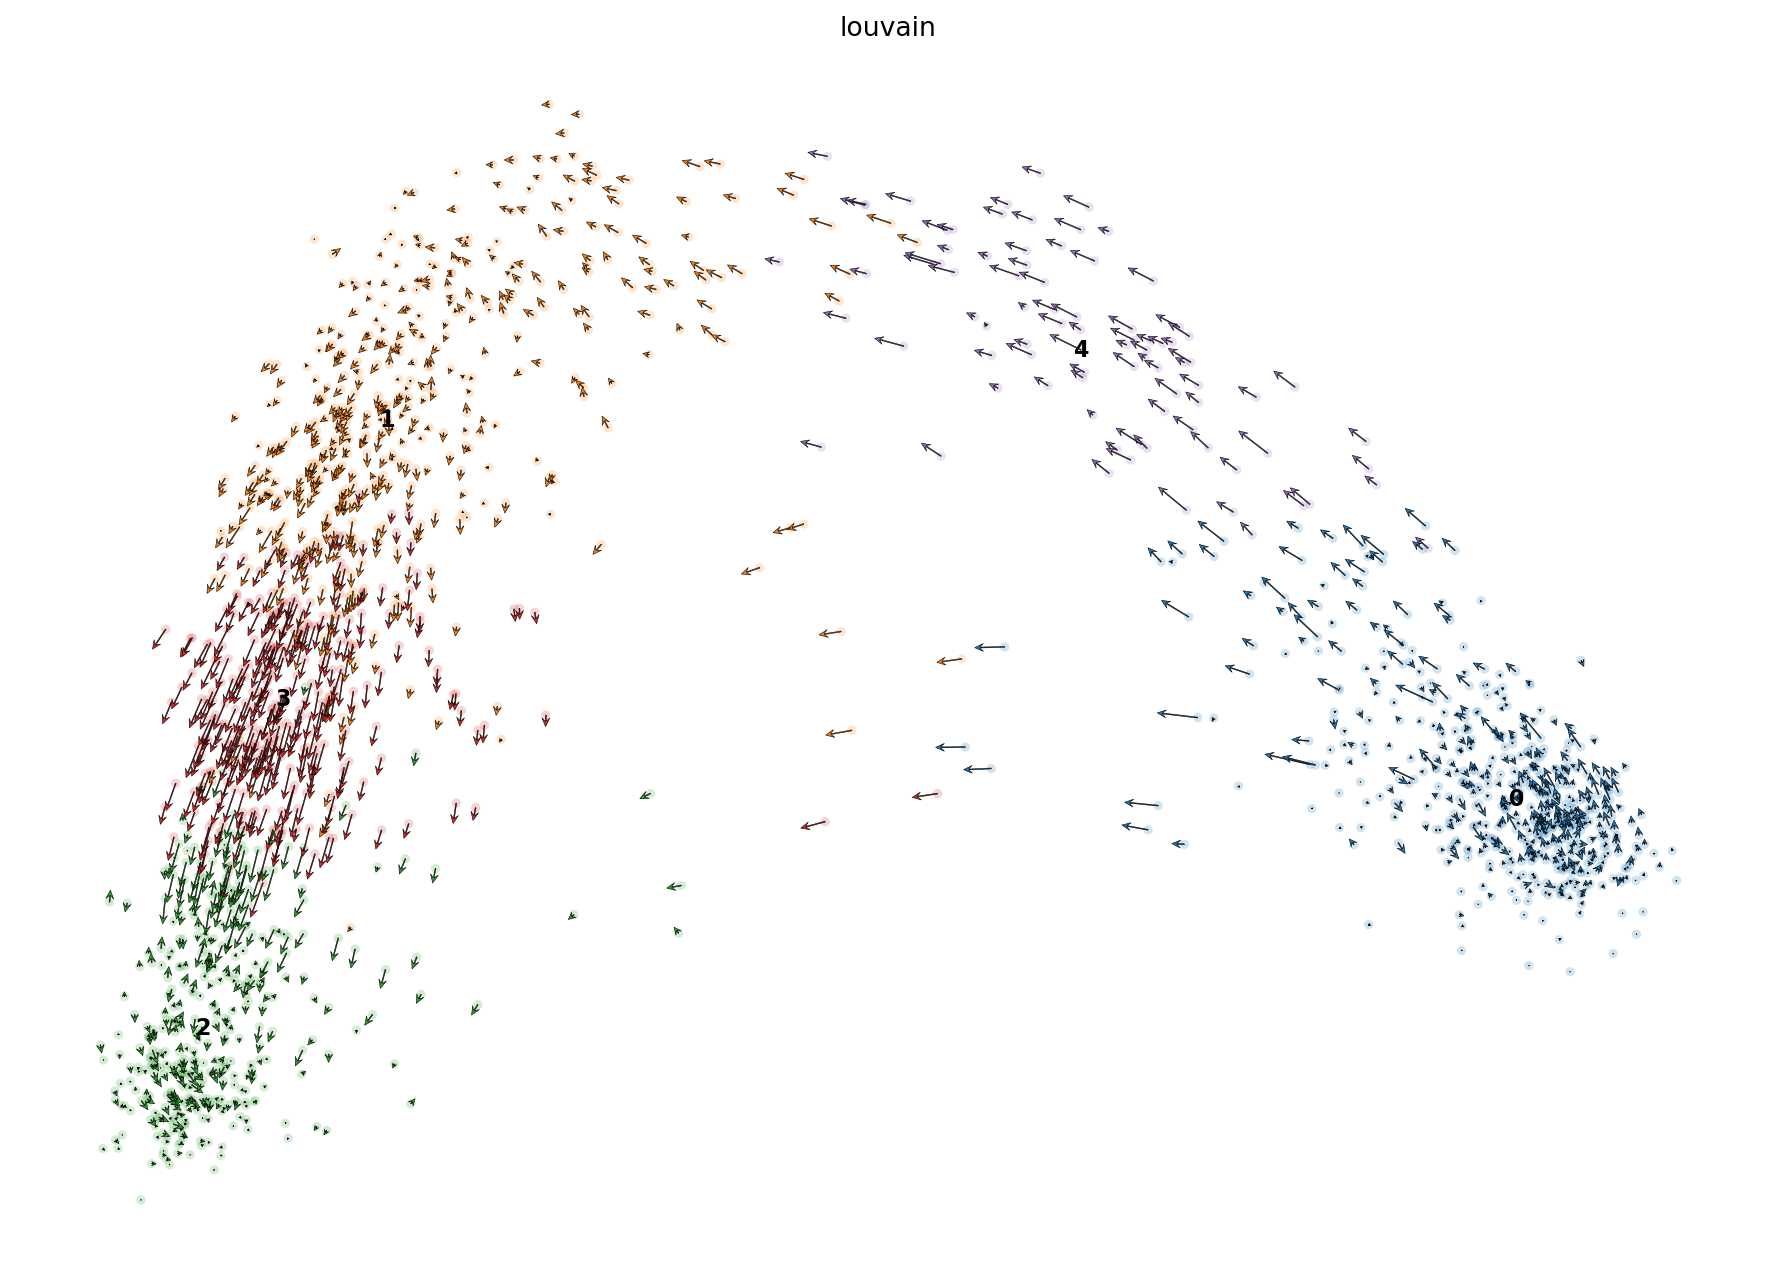

In [8]:
scv.pl.velocity_embedding(adata, basis='pca', color='louvain', scale=2, legend_loc='on data')

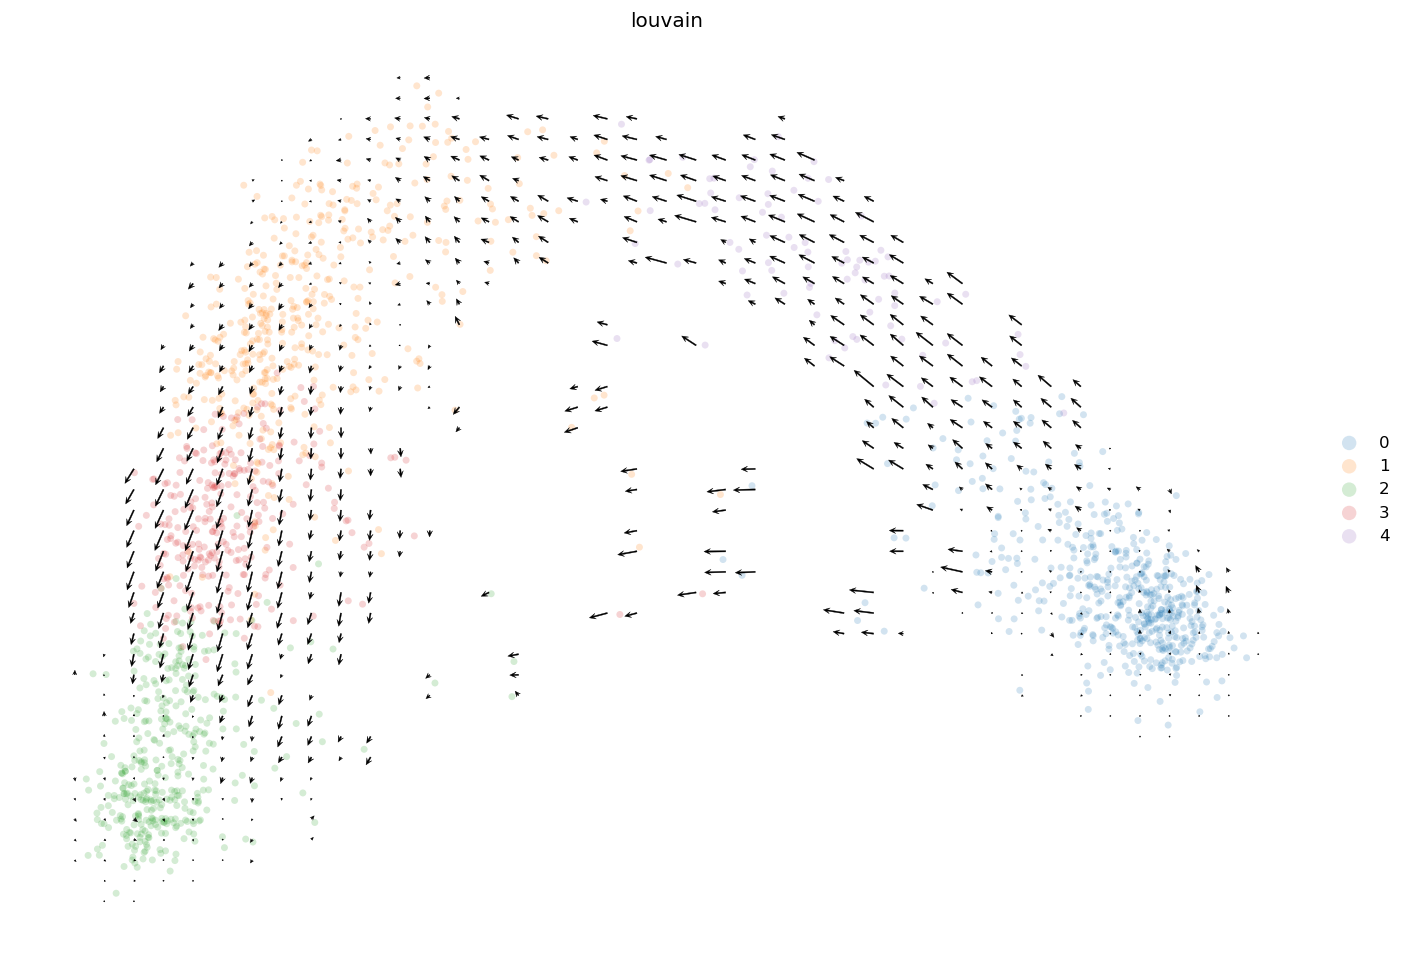

In [9]:
scv.pl.velocity_embedding_grid(adata, basis='pca', color='louvain', density=1, scale=2)

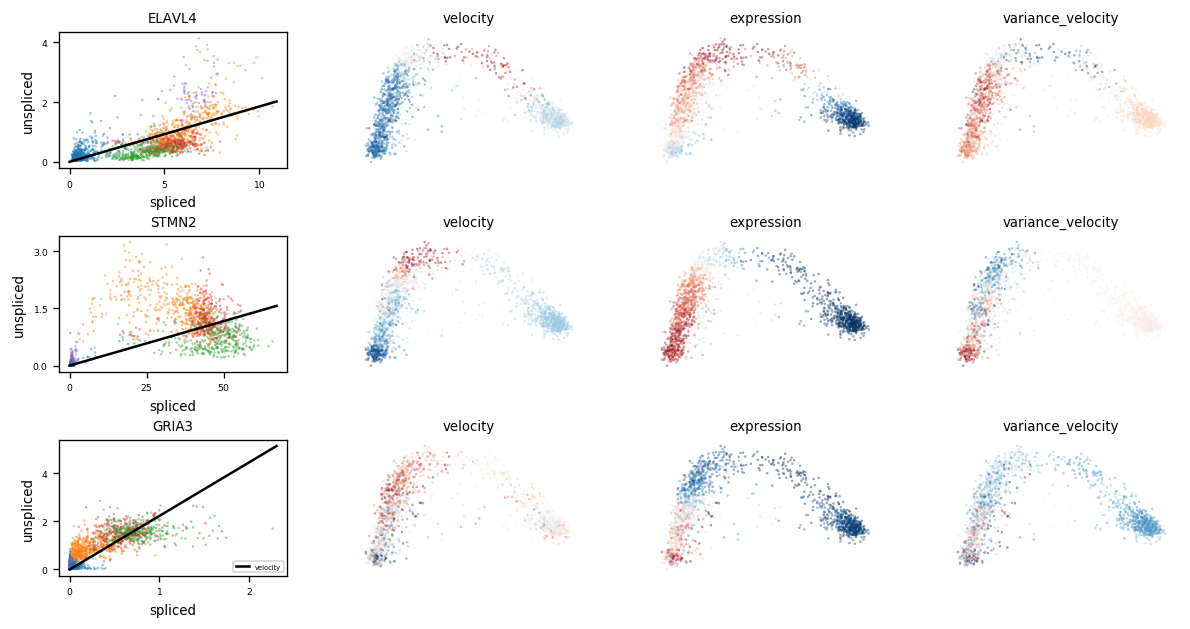

In [10]:
scv.pl.velocity(adata, basis='pca', var_names=["ELAVL4", "STMN2", "GRIA3"], color='louvain')